In [1]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import matplotlib

%load_ext sql
%sql sqlite:///Event.sqlite

The database is impoted and converted to a pandas dataframe, much better for data analysis in python and also better for exporting the data to numpy

In [2]:
cnx = sqlite3.connect(r'Event.sqlite')

# create the dataframe from a query
df = pd.read_sql_query("SELECT * FROM Event", cnx)

In [3]:
df

,ID,DateTimeEventTT,Satellite,Type1,Type2,Type3,Origin,DateTimeAdded
0,1,2020-01-01 15:17:59,1,OM,D,EXT,Thuillot,2020-12-13 12:52:55
1,2,2020-01-01 15:21:38,1,OM,D,INT,Thuillot,2020-12-13 12:52:55
2,3,2020-01-01 15:23:21,1,PA,D,EXT,Thuillot,2020-12-13 12:52:55
3,4,2020-01-01 15:27:01,1,PA,D,INT,Thuillot,2020-12-13 12:52:55
4,5,2020-01-01 17:32:48,1,OM,F,INT,Thuillot,2020-12-13 12:52:55
...,...,...,...,...,...,...,...,...
39588,80833,2020-12-31 07:06:17,2,OM,F,EXT,Apparent moon radius + Elliptical + Time corre...,2021-01-26 20:39:20
39589,80834,2020-12-31 07:19:59,1,PA,F,INT,Apparent moon radius + Elliptical + Time corre...,2021-01-26 20:39:20
39590,80835,2020-12-31 07:23:31,1,PA,F,EXT,Apparent moon radius + Elliptical + Time corre...,2021-01-26 20:39:20
39591,80836,2020-12-31 07:49:53,1,OM,F,INT,Apparent moon radius + Elliptical + Time corre...,2021-01-26 20:39:20


In [4]:
df.Origin == 'PyMeeus'

0        False
1        False
2        False
3        False
4        False
         ...  
39588    False
39589    False
39590    False
39591    False
39592    False
Name: Origin, Length: 39593, dtype: bool

In [5]:
sql_cmd = """

WITH

PyMeeus AS
(
SELECT DateTimeEventTT, Satellite || Type1 || Type2 || Type3 AS Type, DateTimeEventTT, 
Satellite, Type1, Type2, Type3
FROM Event
WHERE Origin="PyMeeus"
),

Thuillot AS
(
SELECT DateTimeEventTT, Satellite || Type1 || Type2 || Type3 AS Type, DateTimeEventTT
FROM Event
WHERE Origin="Thuillot"
)

SELECT p.DateTimeEventTT, p.Satellite, p.Type1, p.Type2, p.Type3, 
strftime('%s', p.DateTimeEventTT) - strftime('%s', t.DateTimeEventTT) AS deltaTime, 
MIN( ABS( strftime('%s', p.DateTimeEventTT) - strftime('%s', t.DateTimeEventTT) )) AS minDeltaTime
FROM (PyMeeus p INNER JOIN Thuillot t
ON p.Type = t.Type)
GROUP BY p.DateTimeEventTT
HAVING minDeltaTime <= 3600

"""

df = pd.read_sql_query(sql_cmd, cnx)

In [6]:
df

,DateTimeEventTT,Satellite,Type1,Type2,Type3,deltaTime,minDeltaTime
0,2020-01-01 15:18:23,1,OM,D,EXT,24,24
1,2020-01-01 15:22:01,1,OM,D,INT,23,23
2,2020-01-01 15:23:25,1,PA,D,EXT,4,4
3,2020-01-01 15:27:03,1,PA,D,INT,2,2
4,2020-01-01 17:32:16,1,OM,F,INT,-32,32
...,...,...,...,...,...,...,...
5218,2020-12-31 07:06:17,2,OM,F,EXT,-3,3
5219,2020-12-31 07:19:59,1,PA,F,INT,3,3
5220,2020-12-31 07:23:31,1,PA,F,EXT,1,1
5221,2020-12-31 07:49:53,1,OM,F,INT,-9,9


In [7]:
df['Type1'].unique()

array(['OM', 'PA', 'EC', 'OC'], dtype=object)

In [8]:
df_OM_INT= df[((df.Satellite == 1)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'INT'))|
   ((df.Satellite == 2)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'INT'))|
   ((df.Satellite == 3)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'INT'))|  
   ((df.Satellite == 4)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'INT'))
  ]

In [9]:
df_OM_EXT= df[((df.Satellite == 1)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'INT'))|
   ((df.Satellite == 2)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'INT'))|
   ((df.Satellite == 3)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'INT'))|  
   ((df.Satellite == 4)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'INT'))
  ]

In [10]:
df_EC_INT= df[((df.Satellite == 1)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))|
   ((df.Satellite == 2)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))|
   ((df.Satellite == 3)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))|  
   ((df.Satellite == 4)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))
  ]

df_EC_INT

,DateTimeEventTT,Satellite,Type1,Type2,Type3,deltaTime,minDeltaTime
10,2020-01-01 21:04:05,2,EC,D,INT,-22,22
15,2020-01-02 09:26:31,3,EC,D,INT,-29,29
19,2020-01-02 12:41:37,1,EC,D,INT,2,2
41,2020-01-04 07:10:16,1,EC,D,INT,2,2
54,2020-01-05 10:21:16,2,EC,D,INT,-23,23
...,...,...,...,...,...,...,...
4629,2020-11-19 20:46:39,3,EC,D,INT,-73,73
4733,2020-11-27 00:47:08,3,EC,D,INT,-72,72
4761,2020-11-28 18:24:20,4,EC,D,INT,42,42
4839,2020-12-04 04:47:41,3,EC,D,INT,-72,72


# Eclipses

## IO

/home/vserra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7f4613ef9a58>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  # This is added back by InteractiveShellApp.init_path()
/home/vserra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7f4614e149e8>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  # This is added back by InteractiveShellApp.init_path()


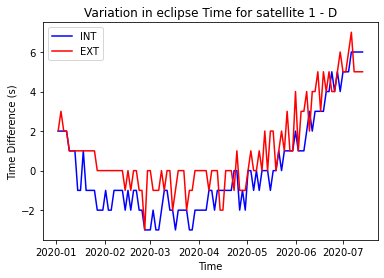

In [24]:
df_EC_INT_IO_INT= df[((df.Satellite == 1)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in eclipse Time for satellite 1 - D')
plt.legend((intr,ext), ('INT', 'EXT'))

df_EC_INT_IO_EXT= df[((df.Satellite == 1)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in eclipse Time for satellite 1 - D')
plt.legend(('INT', 'EXT'))

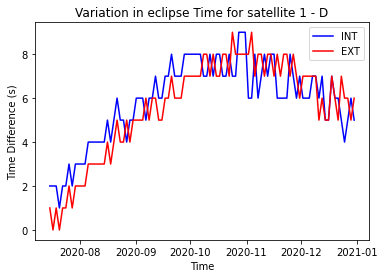

In [26]:
df_EC_INT_IO_INT= df[((df.Satellite == 1)&(df.Type1 == 'EC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 1)&(df.Type1 == 'EC')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in eclipse Time for satellite 1 - D')
plt.legend(('INT', 'EXT'))

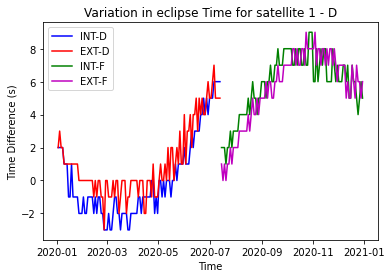

In [35]:
df_EC_INT_IO_INT= df[((df.Satellite == 1)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 1)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

df_EC_INT_IO_INT= df[((df.Satellite == 1)&(df.Type1 == 'EC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'g-')

df_EC_INT_IO_EXT= df[((df.Satellite == 1)&(df.Type1 == 'EC')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'m-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in eclipse Time for satellite 1')
plt.legend(('INT-D', 'EXT-D', 'INT-F','EXT-F'))

## EUROPA

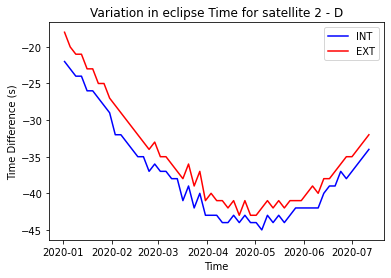

In [28]:
df_EC_INT_IO_INT= df[((df.Satellite == 2)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 2)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in eclipse Time for satellite 2 - D')
plt.legend(('INT', 'EXT'))

For Io and Europa there is roughly a sin-function decribing their yearly variations with different pahase, amplitiude and frequency. The error seems to increase with an increasing incliation of the satellite's orbital plane if compared to the Jovian ecliptic, indicating that the error source might indeed be not having considered Jupiter's rotational axis inclination with regard to the jovian ecliptic.

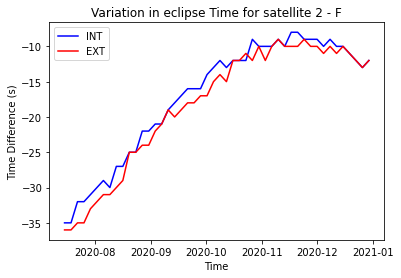

In [30]:
df_EC_INT_IO_INT= df[((df.Satellite == 2)&(df.Type1 == 'EC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 2)&(df.Type1 == 'EC')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in eclipse Time for satellite 2 - F')
plt.legend(('INT', 'EXT'))

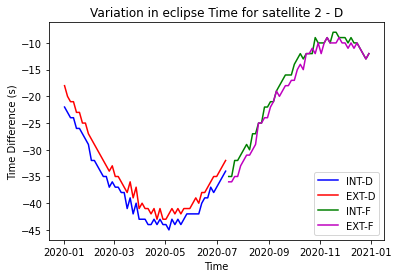

In [36]:
df_EC_INT_IO_INT= df[((df.Satellite == 2)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 2)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

df_EC_INT_IO_INT= df[((df.Satellite == 2)&(df.Type1 == 'EC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'g-')

df_EC_INT_IO_EXT= df[((df.Satellite == 2)&(df.Type1 == 'EC')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'m-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in eclipse Time for satellite 2')
plt.legend(('INT-D', 'EXT-D', 'INT-F','EXT-F'))

## CALLISTO

In [ ]:
df_EC_INT_IO_INT= df[((df.Satellite == 3)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 3)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_EXT['deltaTime'].to_numpy(), 'r-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in eclipse Time for satellite 3 - D')
plt.legend(('INT-D', 'EXT-D'))

In [ ]:
df_EC_INT_IO_INT= df[((df.Satellite == 3)&(df.Type1 == 'EC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 3)&(df.Type1 == 'EC')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in eclipse Time for satellite 3 - F')
plt.legend(('INT', 'EXT'))

In [ ]:
df_EC_INT_IO_INT= df[((df.Satellite == 3)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 3)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

df_EC_INT_IO_INT= df[((df.Satellite == 3)&(df.Type1 == 'EC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'g-')

df_EC_INT_IO_EXT= df[((df.Satellite == 3)&(df.Type1 == 'EC')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'m-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in eclipse Time for satellite 3')
plt.legend(('INT-D', 'EXT-D', 'INT-F','EXT-F'))

## GANYMEDE

In [ ]:
df_EC_INT_IO_INT= df[((df.Satellite == 4)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 4)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_EXT['deltaTime'].to_numpy(), 'r-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in eclipse Time for satellite 4 - D')
plt.legend(('INT-D', 'EXT-D'))

In [ ]:
df_EC_INT_IO_INT= df[((df.Satellite == 4)&(df.Type1 == 'EC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 4)&(df.Type1 == 'EC')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in eclipse Time for satellite 4 - F')
plt.legend(('INT', 'EXT'))

In [ ]:
df_EC_INT_IO_INT= df[((df.Satellite == 4)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 4)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

df_EC_INT_IO_INT= df[((df.Satellite == 4)&(df.Type1 == 'EC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'g-')

df_EC_INT_IO_EXT= df[((df.Satellite == 4)&(df.Type1 == 'EC')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'m-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in eclipse Time for satellite 4')
plt.legend(('INT-D', 'EXT-D', 'INT-F','EXT-F'))

In [ ]:
df_EC_INT_IO_INT= df[((df.Satellite == 1)&(df.Type1 == 'EC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]
df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_INT= df[((df.Satellite == 2)&(df.Type1 == 'EC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'r-')

df_EC_INT_IO_INT= df[((df.Satellite == 3)&(df.Type1 == 'EC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]
df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'g-')

df_EC_INT_IO_INT= df[((df.Satellite == 4)&(df.Type1 == 'EC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'm-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in eclipse Time for all satellites - F - INT')
plt.legend(('IO', 'EUROPA', 'GANYMEDE', 'CALLISTO'))

In [ ]:
df_EC_INT_IO_INT= df[((df.Satellite == 1)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]
df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_INT= df[((df.Satellite == 2)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'r-')

df_EC_INT_IO_INT= df[((df.Satellite == 3)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]
df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'g-')

df_EC_INT_IO_INT= df[((df.Satellite == 4)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'm-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in eclipse Time for all satellites - D - INT')
plt.legend(('IO', 'EUROPA', 'GANYMEDE', 'CALLISTO'))

# Transits

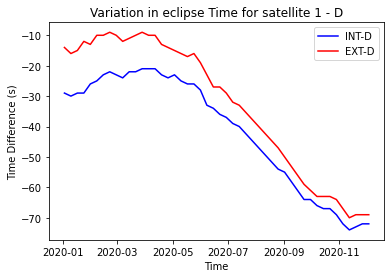

In [39]:
df_EC_INT_IO_INT= df[((df.Satellite == 3)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 3)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_EXT['deltaTime'].to_numpy(), 'r-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in eclipse Time for satellite 3 - D')
plt.legend(('INT-D', 'EXT-D'))

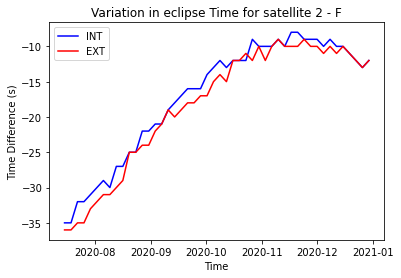

In [30]:
df_EC_INT_IO_INT= df[((df.Satellite == 3)&(df.Type1 == 'EC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 3)&(df.Type1 == 'EC')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in eclipse Time for satellite 3 - F')
plt.legend(('INT', 'EXT'))

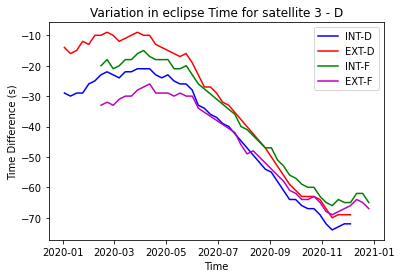

In [40]:
df_EC_INT_IO_INT= df[((df.Satellite == 3)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 3)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

df_EC_INT_IO_INT= df[((df.Satellite == 3)&(df.Type1 == 'EC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'g-')

df_EC_INT_IO_EXT= df[((df.Satellite == 3)&(df.Type1 == 'EC')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'m-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in eclipse Time for satellite 3')
plt.legend(('INT-D', 'EXT-D', 'INT-F','EXT-F'))

## GANYMEDE

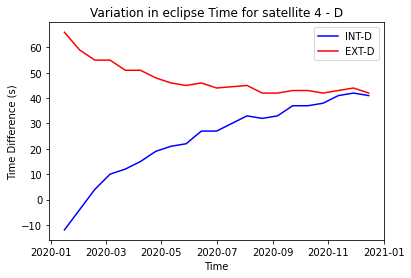

In [41]:
df_EC_INT_IO_INT= df[((df.Satellite == 4)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 4)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_EXT['deltaTime'].to_numpy(), 'r-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in eclipse Time for satellite 4 - D')
plt.legend(('INT-D', 'EXT-D'))

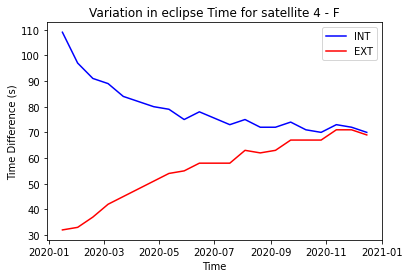

In [42]:
df_EC_INT_IO_INT= df[((df.Satellite == 4)&(df.Type1 == 'EC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 4)&(df.Type1 == 'EC')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in eclipse Time for satellite 4 - F')
plt.legend(('INT', 'EXT'))

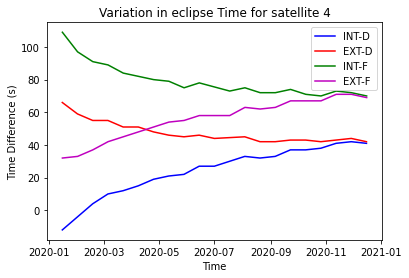

In [43]:
df_EC_INT_IO_INT= df[((df.Satellite == 4)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_EXT= df[((df.Satellite == 4)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'r-')

df_EC_INT_IO_INT= df[((df.Satellite == 4)&(df.Type1 == 'EC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'g-')

df_EC_INT_IO_EXT= df[((df.Satellite == 4)&(df.Type1 == 'EC')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_IO_EXT= df_EC_INT_IO_EXT[[ 'DateTimeEventTT','deltaTime']]

dates_ext = matplotlib.dates.date2num(df_EC_INT_IO_EXT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_ext, df_EC_INT_IO_EXT['deltaTime'].to_numpy(),'m-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in eclipse Time for satellite 4')
plt.legend(('INT-D', 'EXT-D', 'INT-F','EXT-F'))

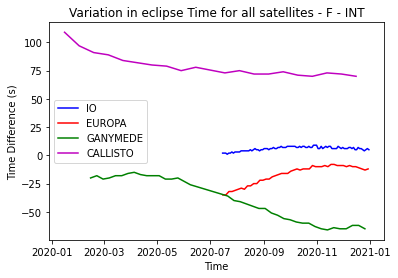

In [48]:
df_EC_INT_IO_INT= df[((df.Satellite == 1)&(df.Type1 == 'EC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]
df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_INT= df[((df.Satellite == 2)&(df.Type1 == 'EC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'r-')

df_EC_INT_IO_INT= df[((df.Satellite == 3)&(df.Type1 == 'EC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]
df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'g-')

df_EC_INT_IO_INT= df[((df.Satellite == 4)&(df.Type1 == 'EC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'm-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in eclipse Time for all satellites - F - INT')
plt.legend(('IO', 'EUROPA', 'GANYMEDE', 'CALLISTO'))

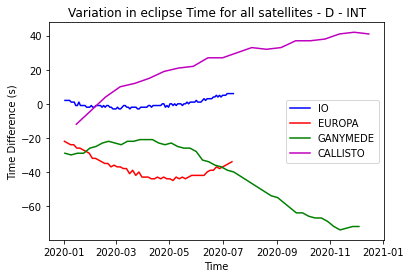

In [49]:
df_EC_INT_IO_INT= df[((df.Satellite == 1)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]
df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'b-')

df_EC_INT_IO_INT= df[((df.Satellite == 2)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'r-')

df_EC_INT_IO_INT= df[((df.Satellite == 3)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]
df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'g-')

df_EC_INT_IO_INT= df[((df.Satellite == 4)&(df.Type1 == 'EC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))]

df_EC_INT_IO_INT= df_EC_INT_IO_INT[[ 'DateTimeEventTT','deltaTime']]

dates_int = matplotlib.dates.date2num(df_EC_INT_IO_INT['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates_int, df_EC_INT_IO_INT['deltaTime'].to_numpy(), 'm-')

plt.ylabel('Time Difference (s)')
plt.xlabel('Time')
plt.title('Variation in eclipse Time for all satellites - D - INT')
plt.legend(('IO', 'EUROPA', 'GANYMEDE', 'CALLISTO'))

# Transits

In [ ]:
df_PA_INT_IO= df[((df.Satellite == 1)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_PA_INT_IO= df_PA_INT_IO[[ 'DateTimeEventTT','deltaTime']]

dates = matplotlib.dates.date2num(df_PA_INT_IO['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates, df_PA_INT_IO['deltaTime'].to_numpy())

df_PA_INT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_PA_INT_EUROPA= df_PA_INT_EUROPA[[ 'DateTimeEventTT','deltaTime']]

dates = matplotlib.dates.date2num(df_PA_INT_EUROPA['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates, df_PA_INT_EUROPA['deltaTime'].to_numpy())

df_PA_INT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_PA_INT_GANYMEDE= df_PA_INT_GANYMEDE[[ 'DateTimeEventTT','deltaTime']]

dates = matplotlib.dates.date2num(df_PA_INT_GANYMEDE['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates, df_PA_INT_GANYMEDE['deltaTime'].to_numpy())

df_PA_INT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_PA_INT_CALLISTO= df_PA_INT_CALLISTO[[ 'DateTimeEventTT','deltaTime']]

dates = matplotlib.dates.date2num(df_PA_INT_CALLISTO['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates, df_PA_INT_CALLISTO['deltaTime'].to_numpy())

Again, greater offset with greater orbital inclination of the moon, seems to be similar to the assumpstions relating to the umbral phenomena. Is really probably correlated to the false assumption that jupiter's rotational axis is consideres to  be perpendicuilar thowards Earth. The greater error in the second section of the curve is probably correlated to the difference in our currently implemented model, which does not consider the phase of Jupiter. 

Strikingy logically, one can see the moment in which Jupiter gets perspectivelly overrun by earth, thus the side with a phase changes.

The curves for the begiining and ending of the phenomena are of course inverted, as the phase on different perspective sides must be taken into accoutn respectively.

The fact that the variation for the side of jupiter not interested by the pahse seems to be yearly points thowards the last hypothesis.

Not condisering the pahse correction gives a sin-artifact with higher amplitude

In [ ]:
df_PA_INT_IO= df[((df.Satellite == 1)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_PA_INT_IO= df_PA_INT_IO[[ 'DateTimeEventTT','deltaTime']]

dates = matplotlib.dates.date2num(df_PA_INT_IO['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates, df_PA_INT_IO['deltaTime'].to_numpy())

df_PA_INT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_PA_INT_EUROPA= df_PA_INT_EUROPA[[ 'DateTimeEventTT','deltaTime']]

dates = matplotlib.dates.date2num(df_PA_INT_EUROPA['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates, df_PA_INT_EUROPA['deltaTime'].to_numpy())

df_PA_INT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_PA_INT_GANYMEDE= df_PA_INT_GANYMEDE[[ 'DateTimeEventTT','deltaTime']]

dates = matplotlib.dates.date2num(df_PA_INT_GANYMEDE['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates, df_PA_INT_GANYMEDE['deltaTime'].to_numpy())

df_PA_INT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_PA_INT_CALLISTO= df_PA_INT_CALLISTO[[ 'DateTimeEventTT','deltaTime']]

dates = matplotlib.dates.date2num(df_PA_INT_CALLISTO['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates, df_PA_INT_CALLISTO['deltaTime'].to_numpy())

In [ ]:
df_PA_INT_IO= df[((df.Satellite == 1)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_PA_INT_IO.to_numpy())

df_PA_EXT_IO= df[((df.Satellite == 1)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_PA_EXT_IO.to_numpy())


In [ ]:
df_PA_INT_IO= df[((df.Satellite == 1)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_PA_INT_IO.to_numpy())

df_PA_EXT_IO= df[((df.Satellite == 1)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_PA_EXT_IO.to_numpy())

In [ ]:
df_PA_INT_IO= df[((df.Satellite == 1)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_PA_INT_IO.to_numpy())

df_PA_EXT_IO= df[((df.Satellite == 1)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_PA_EXT_IO.to_numpy())

df_PA_INT_IO= df[((df.Satellite == 1)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_PA_INT_IO.to_numpy())

df_PA_EXT_IO= df[((df.Satellite == 1)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_PA_EXT_IO.to_numpy())

In [ ]:
df_PA_INT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_PA_INT_EUROPA.to_numpy())

df_PA_EXT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_PA_EXT_EUROPA.to_numpy())


In [ ]:
df_PA_INT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_PA_INT_EUROPA.to_numpy())

df_PA_EXT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_PA_EXT_EUROPA.to_numpy())


In [ ]:
df_PA_INT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_PA_INT_EUROPA.to_numpy())

df_PA_EXT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_PA_EXT_EUROPA.to_numpy())

df_PA_INT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_PA_INT_EUROPA.to_numpy())

df_PA_EXT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_PA_EXT_EUROPA.to_numpy())

In [ ]:
df_PA_INT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_PA_INT_GANYMEDE.to_numpy())

df_PA_EXT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_PA_EXT_GANYMEDE.to_numpy())

In [ ]:
df_PA_INT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_PA_INT_GANYMEDE.to_numpy())

df_PA_EXT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_PA_EXT_GANYMEDE.to_numpy())

In [ ]:
df_PA_INT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_PA_INT_GANYMEDE.to_numpy())

df_PA_EXT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_PA_EXT_GANYMEDE.to_numpy())

df_PA_INT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_PA_INT_GANYMEDE.to_numpy())

df_PA_EXT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_PA_EXT_GANYMEDE.to_numpy())

In [ ]:
df_PA_INT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_PA_INT_CALLISTO.to_numpy())

df_PA_EXT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_PA_EXT_CALLISTO.to_numpy())

In [ ]:
df_PA_INT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_PA_INT_CALLISTO.to_numpy())

df_PA_EXT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_PA_EXT_CALLISTO.to_numpy())

In [ ]:
df_PA_INT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_PA_INT_CALLISTO.to_numpy())

df_PA_EXT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'PA')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_PA_EXT_CALLISTO.to_numpy())

df_PA_INT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_PA_INT_CALLISTO.to_numpy())

df_PA_EXT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'PA')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_PA_EXT_CALLISTO.to_numpy())

Almost perfect correlation, the database seems to break in july, this needs to be investigated

# Transit of the Umbra

In [ ]:
df_OM_INT_IO= df[((df.Satellite == 1)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_OM_INT_IO= df_OM_INT_IO[[ 'DateTimeEventTT','deltaTime']]

dates = matplotlib.dates.date2num(df_OM_INT_IO['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates, df_OM_INT_IO['deltaTime'].to_numpy())

df_OM_INT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_OM_INT_EUROPA= df_OM_INT_EUROPA[[ 'DateTimeEventTT','deltaTime']]

dates = matplotlib.dates.date2num(df_OM_INT_EUROPA['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates, df_OM_INT_EUROPA['deltaTime'].to_numpy())

df_OM_INT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_OM_INT_GANYMEDE= df_OM_INT_GANYMEDE[[ 'DateTimeEventTT','deltaTime']]

dates = matplotlib.dates.date2num(df_OM_INT_GANYMEDE['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates, df_OM_INT_GANYMEDE['deltaTime'].to_numpy())

df_OM_INT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_OM_INT_CALLISTO= df_OM_INT_CALLISTO[[ 'DateTimeEventTT','deltaTime']]

dates = matplotlib.dates.date2num(df_OM_INT_CALLISTO['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates, df_OM_INT_CALLISTO['deltaTime'].to_numpy())

In [ ]:
df_OM_INT_IO= df[((df.Satellite == 1)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_OM_INT_IO= df_OM_INT_IO[[ 'DateTimeEventTT','deltaTime']]

dates = matplotlib.dates.date2num(df_OM_INT_IO['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates, df_OM_INT_IO['deltaTime'].to_numpy())

df_OM_INT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_OM_INT_EUROPA= df_OM_INT_EUROPA[[ 'DateTimeEventTT','deltaTime']]

dates = matplotlib.dates.date2num(df_OM_INT_EUROPA['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates, df_OM_INT_EUROPA['deltaTime'].to_numpy())

df_OM_INT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_OM_INT_GANYMEDE= df_OM_INT_GANYMEDE[[ 'DateTimeEventTT','deltaTime']]

dates = matplotlib.dates.date2num(df_OM_INT_GANYMEDE['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates, df_OM_INT_GANYMEDE['deltaTime'].to_numpy())

df_OM_INT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_OM_INT_CALLISTO= df_OM_INT_CALLISTO[[ 'DateTimeEventTT','deltaTime']]

dates = matplotlib.dates.date2num(df_OM_INT_CALLISTO['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates, df_OM_INT_CALLISTO['deltaTime'].to_numpy())

In [ ]:
df_OM_INT_IO= df[((df.Satellite == 1)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_OM_INT_IO.to_numpy())

df_OM_EXT_IO= df[((df.Satellite == 1)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_OM_EXT_IO.to_numpy())

In [ ]:
df_OM_INT_IO= df[((df.Satellite == 1)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_OM_INT_IO.to_numpy())

df_OM_EXT_IO= df[((df.Satellite == 1)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_OM_EXT_IO.to_numpy())

In [ ]:
df_OM_INT_IO= df[((df.Satellite == 1)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_OM_INT_IO.to_numpy())

df_OM_EXT_IO= df[((df.Satellite == 1)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_OM_EXT_IO.to_numpy())

df_OM_INT_IO= df[((df.Satellite == 1)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_OM_INT_IO.to_numpy())

df_OM_EXT_IO= df[((df.Satellite == 1)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_OM_EXT_IO.to_numpy())

In [ ]:
df_OM_INT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_OM_INT_EUROPA.to_numpy())

df_OM_EXT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_OM_EXT_EUROPA.to_numpy())

In [ ]:
df_OM_INT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_OM_INT_EUROPA.to_numpy())

df_OM_EXT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_OM_EXT_EUROPA.to_numpy())

In [ ]:
df_OM_INT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_OM_INT_EUROPA.to_numpy())

df_OM_EXT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_OM_EXT_EUROPA.to_numpy())

df_OM_INT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_OM_INT_EUROPA.to_numpy())

df_OM_EXT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_OM_EXT_EUROPA.to_numpy())

In [ ]:
df_OM_INT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_OM_INT_GANYMEDE.to_numpy())

df_OM_EXT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_OM_EXT_GANYMEDE.to_numpy())

In [ ]:
df_OM_INT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_OM_INT_GANYMEDE.to_numpy())

df_OM_EXT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_OM_EXT_GANYMEDE.to_numpy())

In [ ]:
df_OM_INT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_OM_INT_GANYMEDE.to_numpy())

df_OM_EXT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_OM_EXT_GANYMEDE.to_numpy())

df_OM_INT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_OM_INT_GANYMEDE.to_numpy())

df_OM_EXT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_OM_EXT_GANYMEDE.to_numpy())

In [ ]:
df_OM_INT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_OM_INT_CALLISTO.to_numpy())

df_OM_EXT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_OM_EXT_CALLISTO.to_numpy())

In [ ]:
df_OM_INT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_OM_INT_CALLISTO.to_numpy())

df_OM_EXT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_OM_EXT_CALLISTO.to_numpy())

In [ ]:
df_OM_INT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_OM_INT_CALLISTO.to_numpy())

df_OM_EXT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'OM')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_OM_EXT_CALLISTO.to_numpy())

df_OM_INT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_OM_INT_CALLISTO.to_numpy())

df_OM_EXT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'OM')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_OM_EXT_CALLISTO.to_numpy())

The artifact deriving from not considering Jupter's pahse is also present, of course coherent to the last (F, D) since the same side of Jupiter is intested by the corssing phenomena and the transit phenomena. 

The correlation of the absolute value of the variation with regard to the orbital inclination is also present.

# Occultations

In [ ]:
df_OC_INT_IO= df[((df.Satellite == 1)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_OC_INT_IO= df_OC_INT_IO[[ 'DateTimeEventTT','deltaTime']]

dates = matplotlib.dates.date2num(df_OC_INT_IO['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates, df_OC_INT_IO['deltaTime'].to_numpy())

df_OC_INT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_OC_INT_EUROPA= df_OC_INT_EUROPA[[ 'DateTimeEventTT','deltaTime']]

dates = matplotlib.dates.date2num(df_OC_INT_EUROPA['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates, df_OC_INT_EUROPA['deltaTime'].to_numpy())

df_OC_INT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_OC_INT_GANYMEDE= df_OC_INT_GANYMEDE[[ 'DateTimeEventTT','deltaTime']]

dates = matplotlib.dates.date2num(df_OC_INT_GANYMEDE['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates, df_OC_INT_GANYMEDE['deltaTime'].to_numpy())

df_OC_INT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))]

df_OC_INT_CALLISTO= df_OC_INT_CALLISTO[[ 'DateTimeEventTT','deltaTime']]

dates = matplotlib.dates.date2num(df_OC_INT_CALLISTO['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates, df_OC_INT_CALLISTO['deltaTime'].to_numpy())

In [ ]:
df_EC_INT_IO= df[((df.Satellite == 1)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_IO= df_EC_INT_IO[[ 'DateTimeEventTT','deltaTime']]

dates = matplotlib.dates.date2num(df_EC_INT_IO['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates, df_EC_INT_IO['deltaTime'].to_numpy())

df_EC_INT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_EUROPA= df_EC_INT_EUROPA[[ 'DateTimeEventTT','deltaTime']]

dates = matplotlib.dates.date2num(df_EC_INT_EUROPA['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates, df_EC_INT_EUROPA['deltaTime'].to_numpy())

df_EC_INT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_GANYMEDE= df_EC_INT_GANYMEDE[[ 'DateTimeEventTT','deltaTime']]

dates = matplotlib.dates.date2num(df_EC_INT_GANYMEDE['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates, df_EC_INT_GANYMEDE['deltaTime'].to_numpy())

df_EC_INT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))]

df_EC_INT_CALLISTO= df_EC_INT_CALLISTO[[ 'DateTimeEventTT','deltaTime']]

dates = matplotlib.dates.date2num(df_EC_INT_CALLISTO['DateTimeEventTT'].to_numpy())
matplotlib.pyplot.plot_date(dates, df_EC_INT_CALLISTO['deltaTime'].to_numpy())

In [ ]:
df_EC_INT_IO= df[((df.Satellite == 1)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_EC_INT_IO.to_numpy())

df_EC_EXT_IO= df[((df.Satellite == 1)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_EC_EXT_IO.to_numpy())

In [ ]:
df_EC_INT_IO= df[((df.Satellite == 1)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_EC_INT_IO.to_numpy())

df_EC_EXT_IO= df[((df.Satellite == 1)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_EC_EXT_IO.to_numpy())

In [ ]:
df_EC_INT_IO= df[((df.Satellite == 1)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_EC_INT_IO.to_numpy())

df_EC_EXT_IO= df[((df.Satellite == 1)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_EC_EXT_IO.to_numpy())

df_EC_INT_IO= df[((df.Satellite == 1)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_EC_INT_IO.to_numpy())

df_EC_EXT_IO= df[((df.Satellite == 1)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_EC_EXT_IO.to_numpy())

In [ ]:
df_EC_INT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_EC_INT_EUROPA.to_numpy())

df_EC_EXT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_EC_EXT_EUROPA.to_numpy())

In [ ]:
df_EC_INT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_EC_INT_EUROPA.to_numpy())

df_EC_EXT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_EC_EXT_EUROPA.to_numpy())

In [ ]:
df_EC_INT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_EC_INT_EUROPA.to_numpy())

df_EC_EXT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_EC_EXT_EUROPA.to_numpy())

df_EC_INT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_EC_INT_EUROPA.to_numpy())

df_EC_EXT_EUROPA= df[((df.Satellite == 2)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_EC_EXT_EUROPA.to_numpy())

In [ ]:
df_EC_INT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_EC_INT_GANYMEDE.to_numpy())

df_EC_EXT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_EC_EXT_GANYMEDE.to_numpy())

In [ ]:
df_EC_INT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_EC_INT_GANYMEDE.to_numpy())

df_EC_EXT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_EC_EXT_GANYMEDE.to_numpy())

In [ ]:
df_EC_INT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_EC_INT_GANYMEDE.to_numpy())

df_EC_EXT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_EC_EXT_GANYMEDE.to_numpy())

df_EC_INT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_EC_INT_GANYMEDE.to_numpy())

df_EC_EXT_GANYMEDE= df[((df.Satellite == 3)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_EC_EXT_GANYMEDE.to_numpy())

In [ ]:
df_EC_INT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_EC_INT_CALLISTO.to_numpy())

df_EC_EXT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_EC_EXT_CALLISTO.to_numpy())

In [ ]:
df_EC_INT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_EC_INT_CALLISTO.to_numpy())

df_EC_EXT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_EC_EXT_CALLISTO.to_numpy())

In [ ]:
df_OC_INT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_OC_INT_CALLISTO.to_numpy())

df_OC_EXT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'OC')&(df.Type2 == 'D')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_OC_EXT_CALLISTO.to_numpy())

df_OC_INT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'INT'))].deltaTime

plt.plot(df_OC_INT_CALLISTO.to_numpy())

df_OC_EXT_CALLISTO= df[((df.Satellite == 4)&(df.Type1 == 'OC')&(df.Type2 == 'F')&(df.Type3 == 'EXT'))].deltaTime

plt.plot(df_OC_EXT_CALLISTO.to_numpy())

Io and Europa exibith again a curve similar to the one considered for eclipses, the correlation of the abs() ob the variation to the orbital inclination of the satellite is also present. No further artifact due to a missing phase correction since it is not required.